In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
a1 = 0.5
b1 = 2
a2 = 0.75
c = 1

poly = lambda x: a1 * x ** b1 + a2 * x + c

x = range(100)
y = [poly(i) for i in x]

x, y

(range(0, 100),
 [1.0,
  2.25,
  4.5,
  7.75,
  12.0,
  17.25,
  23.5,
  30.75,
  39.0,
  48.25,
  58.5,
  69.75,
  82.0,
  95.25,
  109.5,
  124.75,
  141.0,
  158.25,
  176.5,
  195.75,
  216.0,
  237.25,
  259.5,
  282.75,
  307.0,
  332.25,
  358.5,
  385.75,
  414.0,
  443.25,
  473.5,
  504.75,
  537.0,
  570.25,
  604.5,
  639.75,
  676.0,
  713.25,
  751.5,
  790.75,
  831.0,
  872.25,
  914.5,
  957.75,
  1002.0,
  1047.25,
  1093.5,
  1140.75,
  1189.0,
  1238.25,
  1288.5,
  1339.75,
  1392.0,
  1445.25,
  1499.5,
  1554.75,
  1611.0,
  1668.25,
  1726.5,
  1785.75,
  1846.0,
  1907.25,
  1969.5,
  2032.75,
  2097.0,
  2162.25,
  2228.5,
  2295.75,
  2364.0,
  2433.25,
  2503.5,
  2574.75,
  2647.0,
  2720.25,
  2794.5,
  2869.75,
  2946.0,
  3023.25,
  3101.5,
  3180.75,
  3261.0,
  3342.25,
  3424.5,
  3507.75,
  3592.0,
  3677.25,
  3763.5,
  3850.75,
  3939.0,
  4028.25,
  4118.5,
  4209.75,
  4302.0,
  4395.25,
  4489.5,
  4584.75,
  4681.0,
  4778.25,
  4876.5,
  4975.

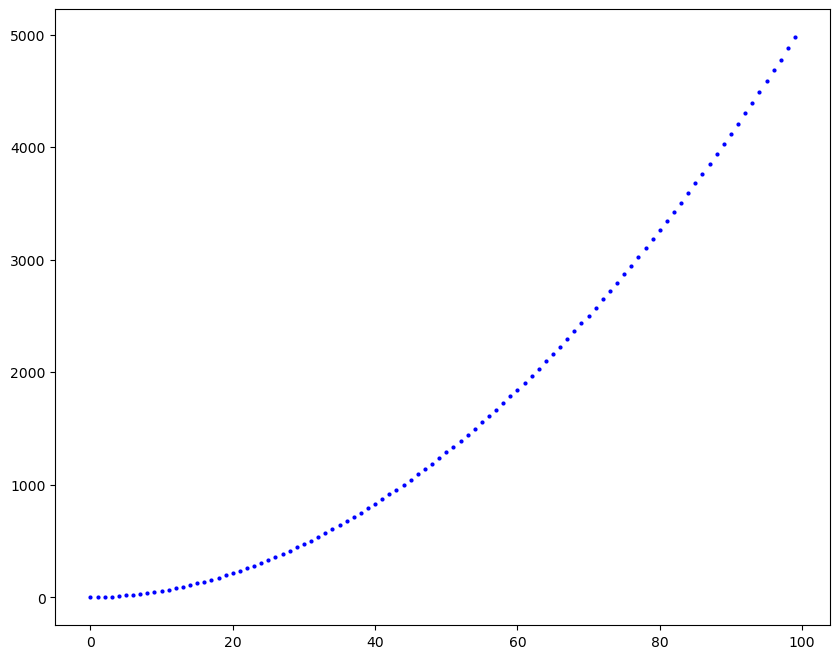

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='b', s=4, label="full polynomial")


In [4]:
import random

p = 0.8
selection = int(len(x) * p)
indices = random.sample(x, selection)
test_indices = torch.tensor(list(set(x).difference(set(indices))))
indices = torch.tensor(indices)
x = torch.tensor(x)
y = torch.tensor(y)
train_in = x[indices]
train_out = y[indices]
test_in = x[test_indices]
test_out = y[test_indices]
#x, indices
#len(test_indices), len(indices)
train_in.shape, train_out.shape, test_in.shape, test_out.shape


(torch.Size([80]), torch.Size([80]), torch.Size([20]), torch.Size([20]))

In [5]:
train_in.unsqueeze(1)

tensor([[97],
        [47],
        [ 2],
        [10],
        [24],
        [ 1],
        [71],
        [38],
        [35],
        [14],
        [59],
        [74],
        [25],
        [12],
        [94],
        [21],
        [18],
        [20],
        [ 0],
        [ 4],
        [45],
        [40],
        [36],
        [66],
        [17],
        [30],
        [87],
        [55],
        [60],
        [91],
        [84],
        [90],
        [80],
        [19],
        [29],
        [64],
        [50],
        [52],
        [54],
        [34],
        [99],
        [ 7],
        [31],
        [67],
        [49],
        [81],
        [86],
        [75],
        [26],
        [39],
        [32],
        [28],
        [58],
        [88],
        [44],
        [89],
        [82],
        [73],
        [51],
        [ 6],
        [33],
        [63],
        [46],
        [42],
        [83],
        [79],
        [ 8],
        [57],
        [37],
        [62],
        [13],
      

In [6]:
class Polyfit(nn.Module):
    def __init__(self):
        super().__init__()
        self.a1 = nn.Parameter(torch.randn(1))
        self.b1 = nn.Parameter(torch.randn(1))
        self.a2 = nn.Parameter(torch.randn(1))
        self.b2 = nn.Parameter(torch.randn(1))
        self.a3 = nn.Parameter(torch.randn(1))
        self.b3 = nn.Parameter(torch.randn(1))
        self.a4 = nn.Parameter(torch.randn(1))
        self.b4 = nn.Parameter(torch.randn(1))
        self.a5 = nn.Parameter(torch.randn(1))
        self.b5 = nn.Parameter(torch.randn(1))
        self.a6 = nn.Parameter(torch.randn(1))
        self.b6 = nn.Parameter(torch.randn(1))
        self.c = nn.Parameter(torch.randn(1))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return (self.a1 * x ** self.b1
                + self.a2 * x ** self.b2
                + self.a3 * x ** self.b3
                + self.a4 * x ** self.b4
                + self.a5 * x ** self.b5
                + self.a6 * x ** self.b6
                + self.c )

In [25]:
model0 = Polyfit()
with torch.inference_mode():
    test_preds = model0(test_in)
    
test_preds, test_in

(tensor([   -7.0846,   -39.6465,   -83.1131,   -91.2024,  -144.0573,  -153.5310,
          -193.1505,  -350.9519,  -375.6579,  -506.3570,  -547.7617,  -618.8788,
          -737.8771,  -753.1842,  -846.9623,  -862.9078,  -878.9418,  -993.6021,
         -1164.4613, -1181.9866]),
 tensor([ 3,  9, 15, 16, 22, 23, 27, 41, 43, 53, 56, 61, 69, 70, 76, 77, 78, 85,
         95, 96]))

OrderedDict([('a1', tensor([1.3489])),
             ('b1', tensor([-0.6253])),
             ('a2', tensor([-0.5871])),
             ('b2', tensor([-0.6710])),
             ('a3', tensor([1.7206])),
             ('b3', tensor([-1.3321])),
             ('a4', tensor([0.1181])),
             ('b4', tensor([-1.7654])),
             ('a5', tensor([0.1770])),
             ('b5', tensor([-0.9083])),
             ('a6', tensor([-1.7634])),
             ('b6', tensor([1.4259])),
             ('c', tensor([0.4836]))])

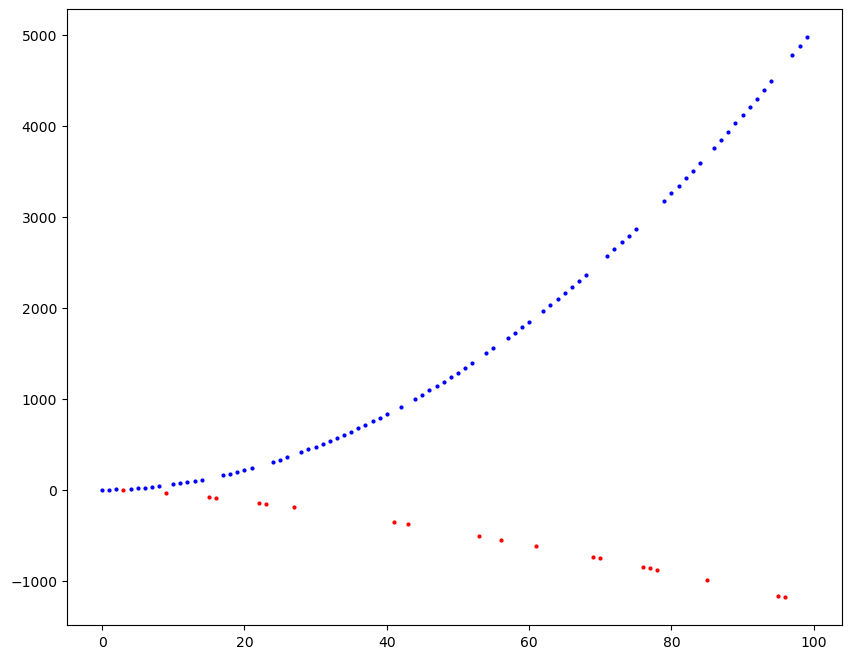

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(train_in, train_out, c='b', s=4, label="test_points")
plt.scatter(test_in, test_preds, c='r', s=4, label="prediction_points")
model0.state_dict()

In [27]:
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(model0.parameters(), lr=0.0001)

In [28]:
epochs = 100
model0.train()
for i in range(epochs):
    train_preds = model0(train_in)
    print(train_preds)
    loss = loss_fn(train_preds, train_out)
    optim.zero_grad()
    loss.backward()
    optim.step()

tensor([-1199.5896,  -426.5394,    -2.9361,   -46.2317,  -163.1812,     1.4976,
         -768.5847,  -314.8495,  -279.9405,   -75.2487,  -590.1219,  -815.3392,
         -173.0038,   -60.2306, -1147.0145,  -134.7648,  -108.0242,  -125.6582,
               nan,   -11.5788,  -400.8580,  -338.7885,  -291.4408,  -692.5238,
          -99.5085,  -224.5715, -1027.1229,  -533.8524,  -604.4493, -1095.1494,
         -976.9667, -1078.0209,  -911.2724,  -116.7428,  -213.9421,  -662.7700,
         -465.9383,  -492.7729,  -520.0505,  -268.5792, -1235.0276,   -27.3850,
         -235.3526,  -707.5461,  -452.6903,  -927.5677, -1010.3209,  -831.1059,
         -182.9949,  -326.7536,  -246.2828,  -203.4674,  -575.8975, -1044.0072,
         -388.1970, -1060.9734,  -943.9489,  -799.6630,  -479.2997,   -21.7483,
         -257.3591,  -648.0401,  -413.6393,  -363.2423,  -960.4155,  -895.0635,
          -33.3582,  -561.7770,  -303.0779,  -633.4094,   -67.6179,  -439.5569,
         -722.6641, -1129.6467,  -784.07

In [19]:
with torch.inference_mode():
    test_preds = model0(test_in)

OrderedDict([('a1', tensor([nan])),
             ('b1', tensor([nan])),
             ('a2', tensor([nan])),
             ('b2', tensor([nan])),
             ('a3', tensor([nan])),
             ('b3', tensor([nan])),
             ('a4', tensor([nan])),
             ('b4', tensor([nan])),
             ('a5', tensor([nan])),
             ('b5', tensor([nan])),
             ('a6', tensor([nan])),
             ('b6', tensor([nan])),
             ('c', tensor([nan]))])

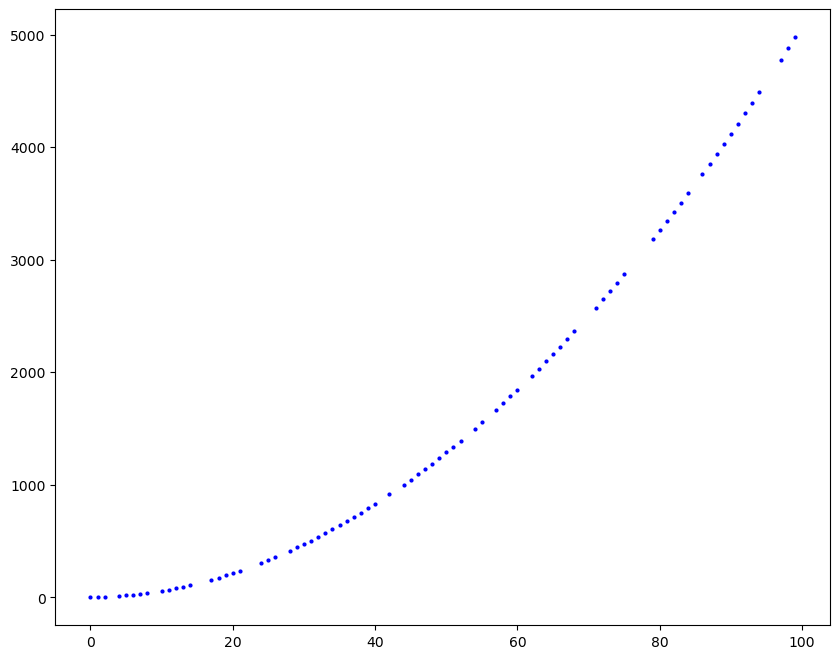

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(train_in, train_out, c="b", s=4, label="Training data")
plt.scatter(test_in, test_preds, c="r", s=4, label="testing data")
model0.state_dict()

In [13]:
class Polyfit2(Polyfit):
    def __init__(self, drop_rate):
        super().__init__()
        self.dropout = nn.Dropout(drop_rate)
        self.linear = nn.Linear(7, 1)
    # to implement dropout, each term needs to be a hidden layer
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        t1 = self.a1 * x ** self.b1
        t2 = self.a2 * x ** self.b2
        t3 = self.a3 * x ** self.b3
        t4 = self.a4 * x ** self.b4
        t5 = self.a5 * x ** self.b5
        t6 = self.a6 * x ** self.b6
        t7 = self.c + x * 0
        terms = torch.stack([t1, t2, t3, t4, t5, t6, t7], dim=1)
        out = self.linear(terms)
        return out

In [521]:
model1 = Polyfit2(0.00)
with torch.inference_mode():
    test_preds = model1(test_in)
len(test_preds), len(test_in)

(20, 20)

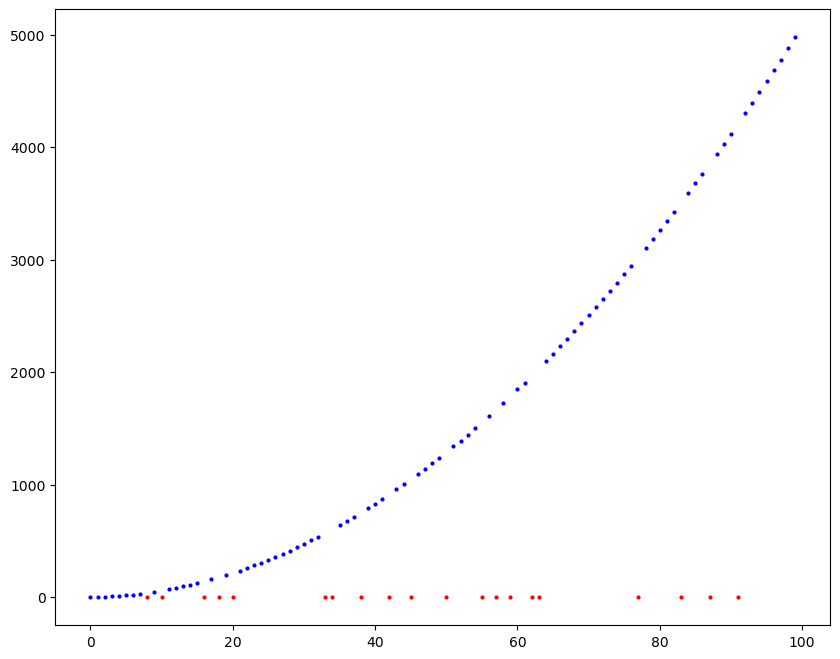

In [522]:
plt.figure(figsize=(10, 8))
plt.scatter(train_in, train_out, c='b', s=4, label="test_points")
plt.scatter(test_in, test_preds, c='r', s=4, label="prediction_points")

In [523]:
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(model1.parameters(), lr=0.1, weight_decay=0.5)

In [524]:
epochs = 1000
model1.train()
for _ in range(epochs):
    train_pred = model1(train_in)
    loss = loss_fn(train_pred, train_out)
    optim.zero_grad()
    loss.backward()
    optim.step()

In [525]:
with torch.inference_mode():
    test_preds = model1(test_in)

OrderedDict([('a1', tensor([nan])),
             ('b1', tensor([nan])),
             ('a2', tensor([nan])),
             ('b2', tensor([nan])),
             ('a3', tensor([nan])),
             ('b3', tensor([nan])),
             ('a4', tensor([nan])),
             ('b4', tensor([nan])),
             ('a5', tensor([nan])),
             ('b5', tensor([nan])),
             ('a6', tensor([nan])),
             ('b6', tensor([nan])),
             ('c', tensor([nan])),
             ('linear.weight', tensor([[nan, nan, nan, nan, nan, nan, nan]])),
             ('linear.bias', tensor([nan]))])

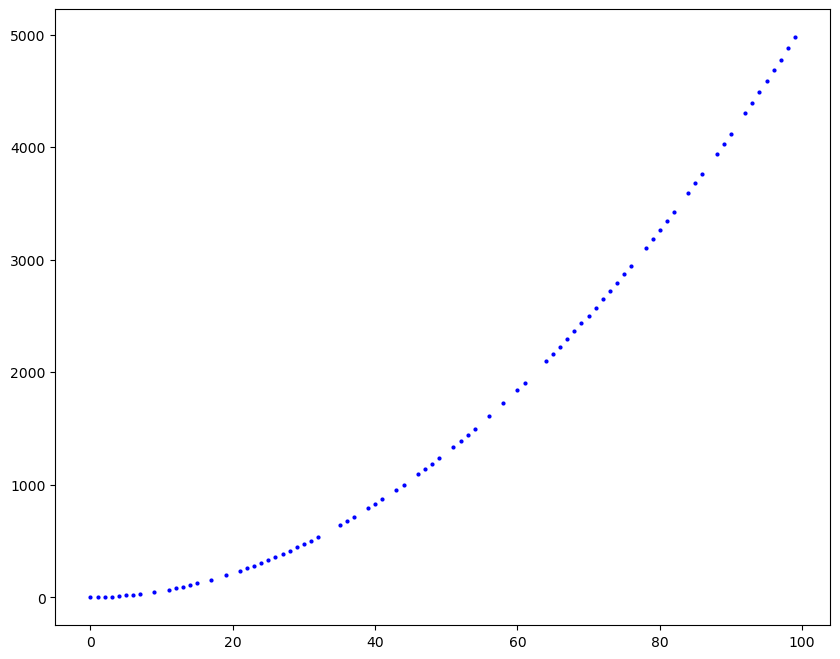

In [526]:
plt.figure(figsize=(10, 8))
plt.scatter(train_in, train_out, c='b', s=4, label="test_points")
plt.scatter(test_in, test_preds, c='r', s=4, label="prediction_points")
model1.state_dict()

In [454]:
class Polyfit3(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(1, 10)
        self.lin2 = nn.Linear(10, 10)
        self.lin3 = nn.Linear(10, 1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out = self.lin1(x)
        out = nn.functional.sigmoid(out)
        out = self.lin2(out)
        out = nn.functional.sigmoid(out)
        return self.lin3(out)
        
        
        

In [455]:
model2 = Polyfit3()
model2.to(dtype=torch.float)
test_preds = []
with torch.inference_mode():
    for i in test_in:
        test_preds.append(model2(i.unsqueeze(0).to(torch.float))) 
len(test_preds), len(test_in)

(20, 20)

OrderedDict([('lin1.weight',
              tensor([[-0.7661],
                      [-0.9089],
                      [-0.6388],
                      [-0.4875],
                      [ 0.1284],
                      [ 0.1830],
                      [-0.5761],
                      [-0.1957],
                      [-0.5011],
                      [ 0.0686]])),
             ('lin1.bias',
              tensor([ 0.4886, -0.1919,  0.5180,  0.5635, -0.9541, -0.8429,  0.2601, -0.4123,
                      -0.2124,  0.0770])),
             ('lin2.weight',
              tensor([[ 0.1109,  0.1362, -0.0445, -0.2205,  0.1406,  0.0603,  0.3032,  0.1201,
                       -0.0112,  0.0496],
                      [ 0.0268, -0.2317, -0.1014,  0.3151, -0.1211,  0.3144, -0.1772,  0.2566,
                       -0.1568, -0.2098],
                      [-0.0195, -0.1991, -0.0821,  0.2259,  0.2932,  0.2714,  0.0519, -0.1039,
                       -0.0028,  0.0448],
                      [ 0.0034, -0

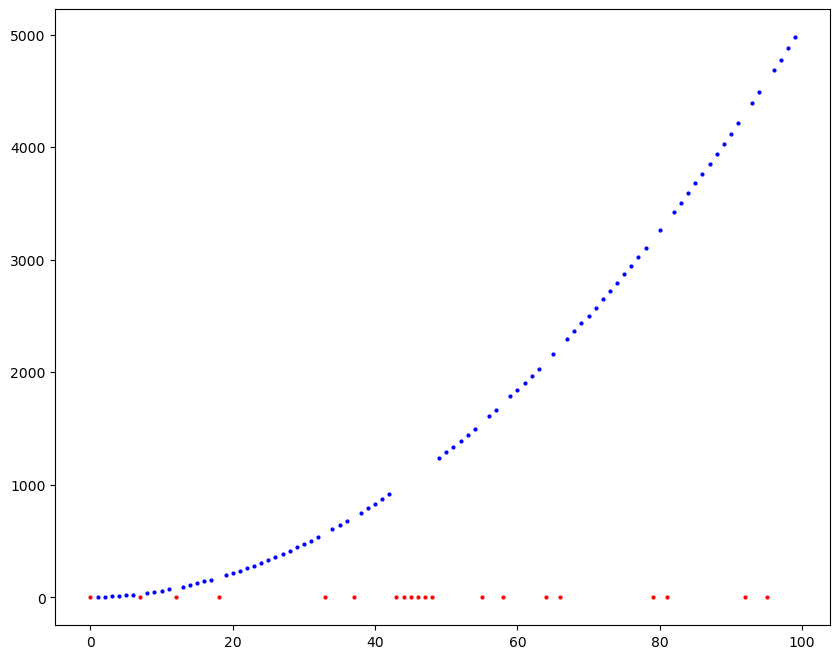

In [456]:
plt.figure(figsize=(10, 8))
plt.scatter(train_in, train_out, c='b', s=4, label="test_points")
plt.scatter(test_in, test_preds, c='r', s=4, label="prediction_points")
model2.state_dict()

In [457]:
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(model2.parameters(), lr=0.1, weight_decay=0.5)

In [458]:
for i in model2.parameters():
    print(i.dtype)
    break
print(train_in.dtype)

torch.float32
torch.int64


In [459]:
epochs = 100
model2.train()
for _ in range(epochs):
    train_pred = model2(train_in.to(torch.float).view(80, 1))
    loss = loss_fn(train_pred, train_out)
    optim.zero_grad()
    loss.backward()
    optim.step()

In [463]:
with torch.inference_mode():
    test_preds = model2(test_in.to(torch.float).view(20,1))


OrderedDict([('lin1.weight',
              tensor([[-0.1220],
                      [-0.7117],
                      [ 0.6873],
                      [ 0.8830],
                      [ 1.1278],
                      [ 1.0685],
                      [ 0.4225],
                      [ 0.6343],
                      [ 0.6608],
                      [ 0.8392]])),
             ('lin1.bias',
              tensor([0.1224, 0.0590, 1.1800, 0.1619, 0.1818, 0.1980, 0.2170, 0.7402, 0.8289,
                      0.5751])),
             ('lin2.weight',
              tensor([[0.1084, 0.0513, 0.9337, 0.8371, 1.6558, 1.5825, 0.8218, 1.3956, 1.1467,
                       1.5246],
                      [0.9200, 0.7606, 1.3929, 1.4317, 1.1336, 1.5487, 1.1711, 1.9046, 1.4194,
                       1.2058],
                      [0.1023, 0.0388, 0.8400, 0.8957, 1.7289, 1.7105, 0.8832, 1.1547, 1.0375,
                       1.4723],
                      [0.0883, 0.0381, 0.9420, 0.8024, 1.7242, 1.5331, 0.7

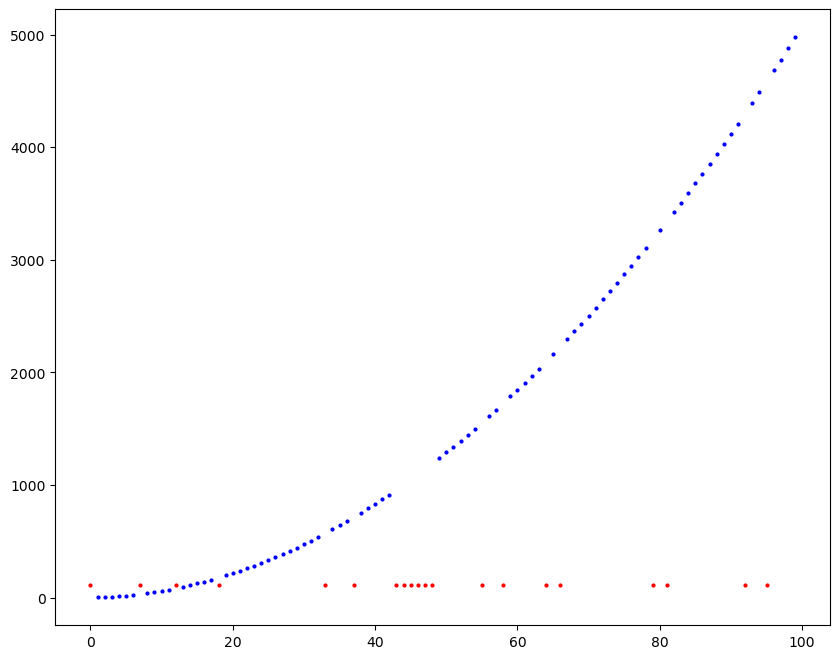

In [464]:
plt.figure(figsize=(10, 8))
plt.scatter(train_in, train_out, c='b', s=4, label="test_points")
plt.scatter(test_in, test_preds, c='r', s=4, label="prediction_points")
model2.state_dict()